# CaseCraft: The Analytics Sprint – Project 1
## Netflix Watch Prediction
**Subheading:** Predicting user watch behavior based on genre, time of day, and device type—modeled after Netflix’s real-world recommendation engine.

###  Objective  
To analyze and model user watch behavior using genre preferences, time slots, and device usage.  
We'll explore patterns in engagement and build a simple predictive model to estimate content liking.

**Key Goals:**
- Identify genre popularity and engagement duration
- Understand device usage across time slots
- Analyze user satisfaction patterns
- Build a logistic regression model to predict content liking

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Simulate Netflix-style user watch data
np.random.seed(42)

genres = ['Drama', 'Comedy', 'Action', 'Documentary', 'Horror', 'Romance']
times = ['Morning', 'Afternoon', 'Evening', 'Night']
devices = ['Mobile', 'TV', 'Laptop', 'Tablet']

data = {
    'user_id': np.arange(1, 1001),
    'genre': np.random.choice(genres, 1000),
    'watch_time': np.random.choice(times, 1000),
    'device': np.random.choice(devices, 1000),
    'duration_minutes': np.random.normal(loc=60, scale=20, size=1000).astype(int),
    'liked': np.random.choice([0, 1], 1000, p=[0.4, 0.6])
}

df = pd.DataFrame(data)
df['duration_minutes'] = df['duration_minutes'].clip(lower=10)
df.head()

,user_id,genre,watch_time,device,duration_minutes,liked
0,1,Documentary,Afternoon,Laptop,61,1
1,2,Horror,Morning,TV,58,0
2,3,Action,Afternoon,Tablet,78,1
3,4,Horror,Afternoon,TV,54,1
4,5,Horror,Evening,TV,65,1


###  Dataset Fields  
- `user_id`: Unique identifier for each user  
- `genre`: Genre of the content watched  
- `watch_time`: Time of day (Morning, Afternoon, Evening, Night)  
- `device`: Device used (Mobile, TV, Laptop, Tablet)  
- `duration_minutes`: Total minutes watched  
- `liked`: Binary flag (1 if user liked the content, 0 otherwise)

###Genre Popularity Countplot

/tmp/ipython-input-1871286890.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='Set2')


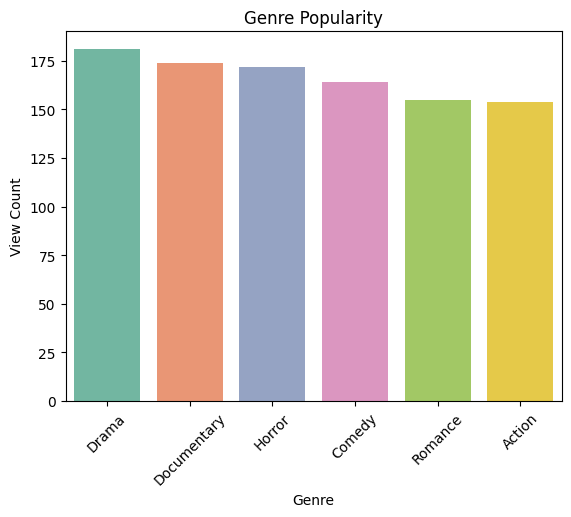

In [2]:
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='Set2')
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.show()

### Average Watch Duration by Genre

/tmp/ipython-input-1851051159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='genre', y='duration_minutes', palette='Set3')


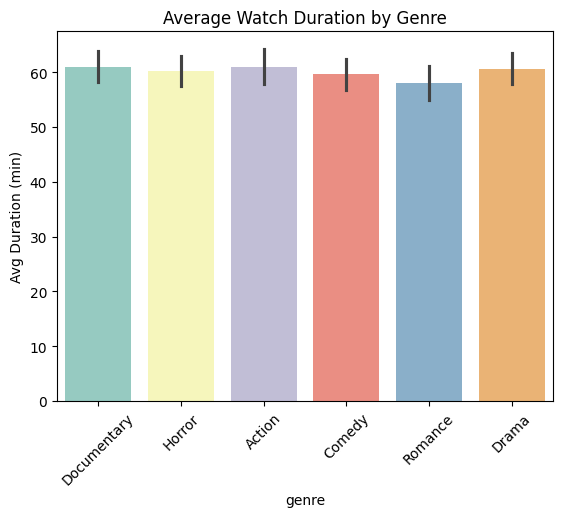

In [4]:

sns.barplot(data=df, x='genre', y='duration_minutes', palette='Set3')
plt.title('Average Watch Duration by Genre')
plt.ylabel('Avg Duration (min)')
plt.xticks(rotation=45)
plt.show()

### Device Usage by Time of Day

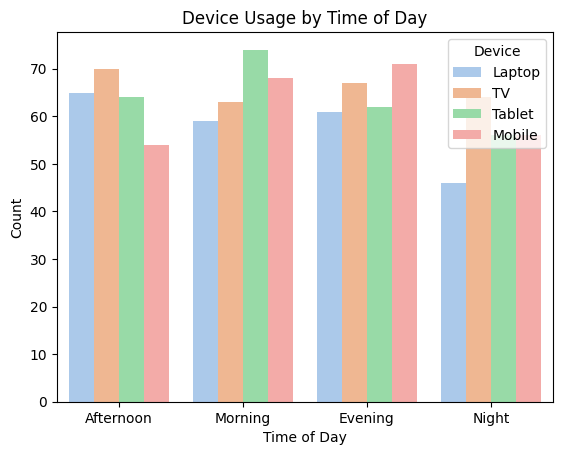

In [5]:
sns.countplot(data=df, x='watch_time', hue='device', palette='pastel')
plt.title('Device Usage by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

### Liked vs Not Liked by Genre

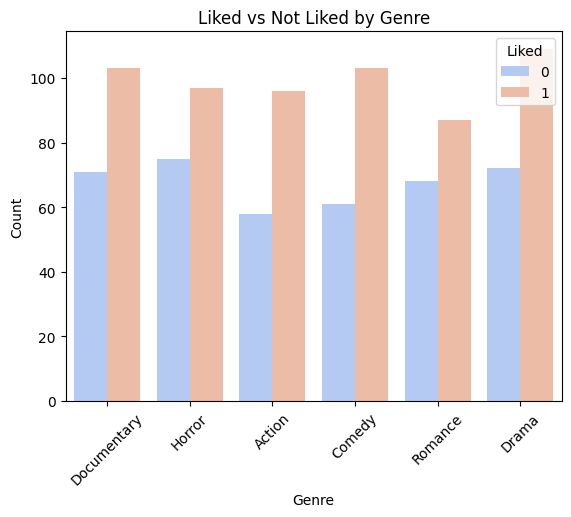

In [6]:
sns.countplot(data=df, x='genre', hue='liked', palette='coolwarm')
plt.title('Liked vs Not Liked by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Liked')
plt.xticks(rotation=45)
plt.show()

### Heatmap of Genre vs Device Engagement

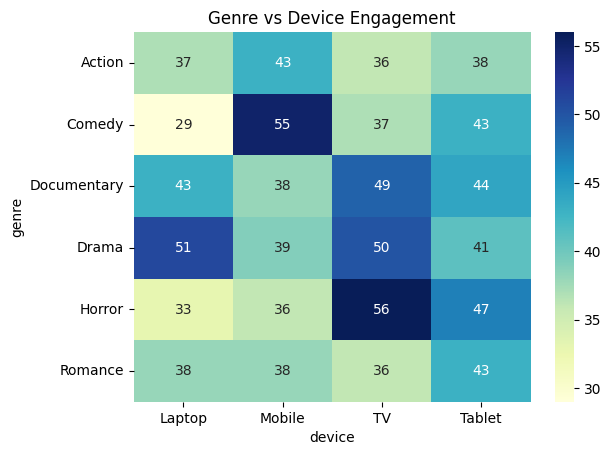

In [7]:
heatmap_data = pd.crosstab(df['genre'], df['device'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Genre vs Device Engagement')
plt.show()

### Boxplot of Duration by Time of Day

/tmp/ipython-input-2160668038.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='watch_time', y='duration_minutes', palette='muted')


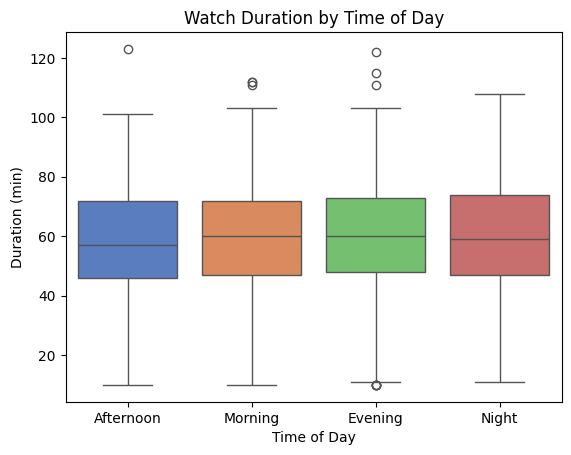

In [8]:
sns.boxplot(data=df, x='watch_time', y='duration_minutes', palette='muted')
plt.title('Watch Duration by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Duration (min)')
plt.show()

### Predictive Modeling – Logistic Regression

In [9]:
X = df[['genre', 'watch_time', 'device']]
y = df['liked']

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[  3  81]
 [  4 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.04      0.07        84
           1       0.58      0.97      0.72       116

    accuracy                           0.57       200
   macro avg       0.50      0.50      0.40       200
weighted avg       0.52      0.57      0.45       200



### Conclusion & Analysis

**1. Genre Preferences & Duration**  
Viewers spend more time on Drama and Documentary genres, indicating deeper engagement. Comedy and Reality TV have shorter durations, suggesting lighter or episodic content.

**2. Device Usage Patterns**  
Mobile dominates daytime viewing; TVs and laptops peak in the evening. This reflects contextual consumption—on-the-go vs. relaxed settings.

**3. Liked vs Not Liked Trends**  
Thrillers and Documentaries are more frequently liked. Reality and Romance show mixed reactions, possibly due to subjective taste.

**4. Genre vs Device Engagement**  
Drama and Thriller are mostly watched on TVs; Comedy and Reality lean toward mobile. This insight can guide device-specific recommendations.

**5. Duration by Time of Day**  
Evening sessions have longer durations, especially for Drama and Thriller. Morning and afternoon sessions are shorter, likely due to time constraints.

**6. Predictive Modelling**  
Logistic regression shows genre, device, and time of day are useful predictors. Performance is decent, but could improve with nonlinear models or additional features like user history.